# PROJECT 1 INTRO ML GROUP 248
##### 3. Data visualization(s) based on suitable visualization techniques in- cluding a principal component analysis (PCA)

In [5]:
import importlib_resources
import numpy as np
import xlrd
from scipy.linalg import svd
import os
os.chdir(r"C:\Users\elefa\OneDrive - Danmarks Tekniske Universitet\DTU\FALL2024\02450_ITMLADM\PROJECT\IntroML")
from matplotlib.pyplot  import figure, legend, plot, show, title, xlabel, ylabel, grid, subplot, scatter
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns



In [ ]:
filename = "raw data.csv"
df = pd.read_csv(filename, sep=";")
df.head()

In [ ]:
# Remove columns and rows with all NaN values
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna(axis=0, how='all')
# Display the cleaned DataFrame
df_cleaned.head()

In [ ]:
# Display the data types of the columns in the DataFrame
print(df_cleaned.dtypes)
# Identify columns with object data types that need conversion
columns_to_convert = ['2P%', '3P%', 'FT%']

# Ensure columns are strings, replace commas with dots, and convert to float
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype(str).apply(lambda x: x.str.replace(',', '.').astype(float))

# Display the cleaned DataFrame
print(df_cleaned.dtypes)
print(df_cleaned.head())

In [9]:
features = df_cleaned.columns
X_complete = df_cleaned.values

# Remove the player names from the feature set
df_numeric =df_cleaned[features[1:]]
features_numeric = df_numeric.columns
X = df_numeric.values
N,M =  X.shape  #dimension of the problem


### Check data for visualization

In [ ]:
import matplotlib.pyplot as plt

# Creiamo una griglia di subplots 1x8
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(18, 8))
axes = axes.flatten()

# Modifica per aumentare lo spessore dei font
font_properties = {'fontsize': 18, 'fontweight': 'bold'}

# Generiamo i boxplot per ciascuna feature senza il titolo automatico
for i, feature in enumerate(features_numeric[1:9]):
    df_numeric[feature].plot(kind='box', ax=axes[i], title=None)  # Disabilita il titolo automatico
    # axes[i].set_title(feature, **font_properties)  # Imposta manualmente il titolo
    axes[i].tick_params(axis='both', labelsize=12, width=2)  # Ingrandisci le etichette degli assi

# Layout per evitare sovrapposizioni
plt.tight_layout()

# Mostriamo i plot
plt.show()


Boxplots are fine, they present some outliers but these are mainly there because of there is a little number of values that these datas capture (expecially for blocks, PF and turnovers) and the outliers are justified by a really bad/good game (that we want to keep track of in our analysis)

In [ ]:
# Plot histograms for each feature except the first one
df_numeric.iloc[:, 1:].hist(bins=20, figsize=(12, 8))  # Slice to exclude the first feature
tight_layout()
show()



Most of the attributes are mainly  normally distrubuted, the exceptions are these data that present less accurrance like bloks, steals, pf and of course win since it is a binary attribute


In [ ]:
# Check correlation matrix
corr_matrix = pd.DataFrame(df_numeric, columns=features_numeric).corr()
print(corr_matrix)

# Create a heatmap
figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
title('Correlation Matrix Heatmap')
show()

We can observe from the heatmap that the attributes are not strongly correlated
Low correlations in the dataset suggest that PCA will distribute the variance more evenly across the principal components. This means you might need more components to capture a significant portion of the total variance, making dimensionality reduction less effective compared to datasets with higher correlations.

Like I said above, since there's not high correlation I expect the data to distribute on a lot of different principal components, meaning that the classification aim seems difficult to pursue

In [13]:

# ########## qua provo a togliere colonne perché sennò sgrava tutto mi sa
# columns_to_drop = ['PLAYER','WIN']
# df_dropped = df_cleaned.drop(columns=columns_to_drop)
# X = df_dropped.values
# df_dropped.head()

# features_dropped = df_dropped.columns

# # Check correlation matrix
# corr_matrix = pd.DataFrame(df_dropped, columns=features_dropped).corr()
# print(corr_matrix)

# corr_matrix = df_dropped.corr()


### PCA

In [14]:
############# STANDARDIZE DATA ################
# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(axis=0) #########solo media
Y2 = Y * (1 / np.std(Y, 0))
# ###################### rescale data
# from sklearn.preprocessing import StandardScaler

# # Standardize the features before PCA
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # This scales each feature to mean 0 and variance 1
X_scaled = Y2

Since our attributes are distributed in very different scales, it is important to standardize them before PCa, by mean and variance

In [15]:

############# PCA by computing SVD of Y ################
U, S, V = svd(X_scaled, full_matrices=False)
# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()
# Set a threshold for the cumulative variance
threshold = 0.90


In [ ]:

############# PLOT VARIANCE EXPLAINED ################
figure()
plot(range(1, len(rho) + 1), rho, "x-")
plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plot([1, len(rho)], [threshold, threshold], "k--")
title("Variance explained by principal components")
xlabel("Principal component")
ylabel("Variance explained")
legend(["Individual", "Cumulative", "Threshold"])
grid()
show()

print("PCA completed using SVD on NBA player data.")


From this graph we can see that out pca analysis is not really effective, we can explain more than 60% of the variance with 6 components, and we need 12 to reach the treshold. 

In [ ]:

#Get the loadings (principal components)
loadings = V[:, 6:9]  # First two components

# Create a DataFrame for easy visualization
loadings_df = pd.DataFrame(loadings, index=features_numeric, columns=['PC7','PC8','PC9'])

# Visualize the loadings
figure(figsize=(80, 16))
loadings_df.plot(kind='bar')
title("Feature Contributions to Principal Components")
ylabel("Loading Values")
xlabel("Features")
# xticks(rotation=45)
grid(True)
show()

Here we can see that the directions of the principal component are spread into different attributes and not just a couple. This explains why we need that many components

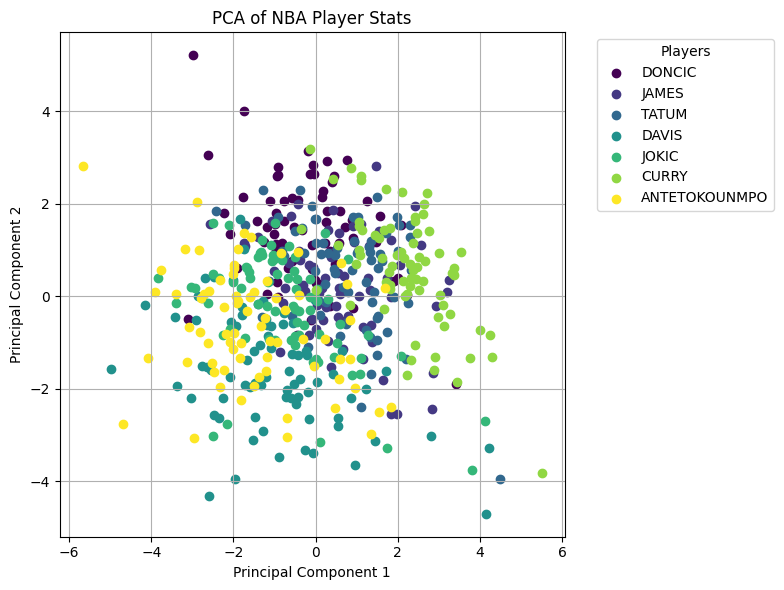

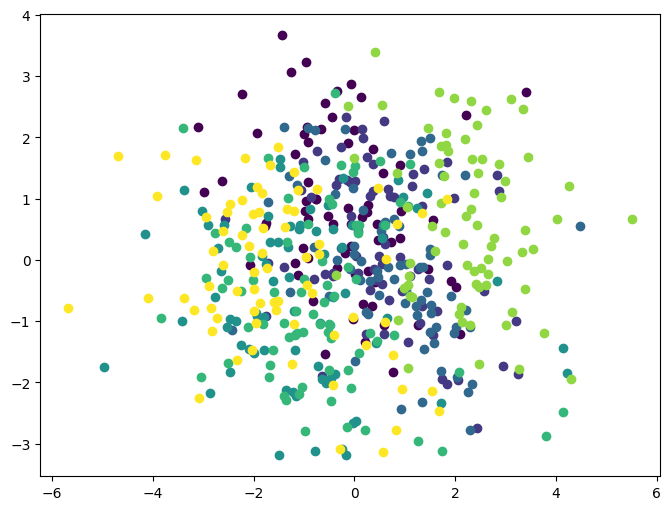

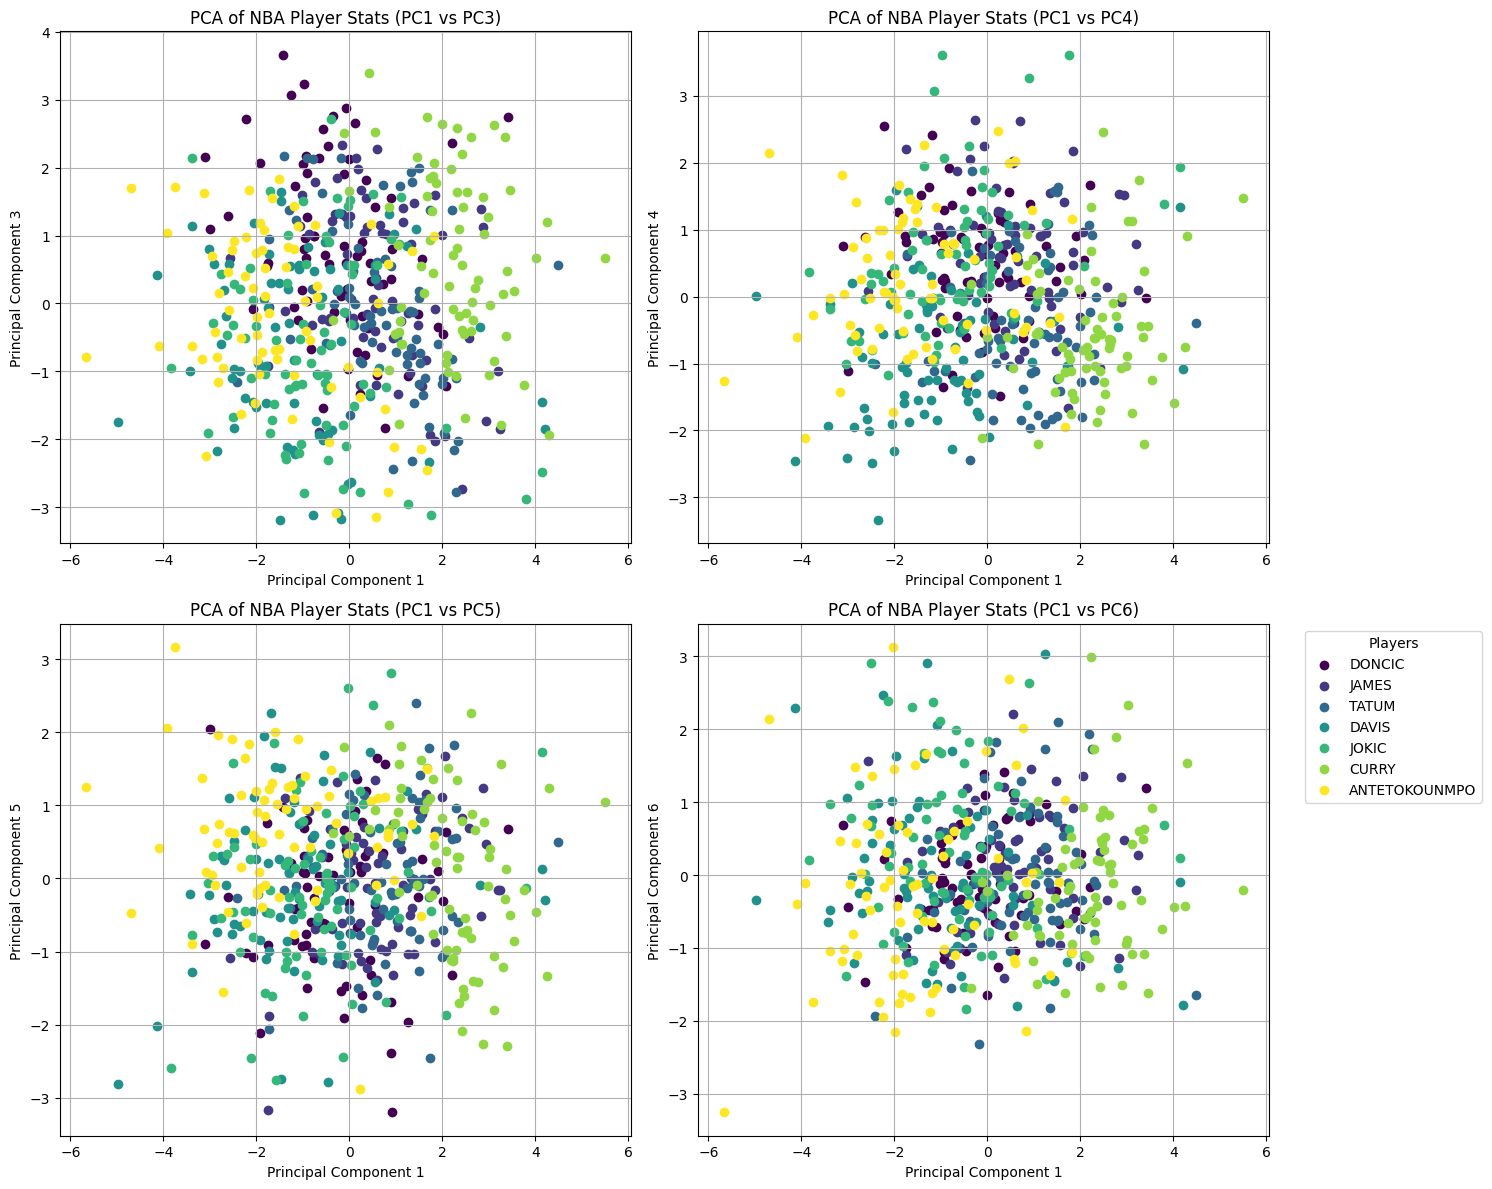

C:\Users\elefa\AppData\Local\Temp\ipykernel_9396\1526572219.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Players", bbox_to_anchor=(1.05, 1), loc='upper left')


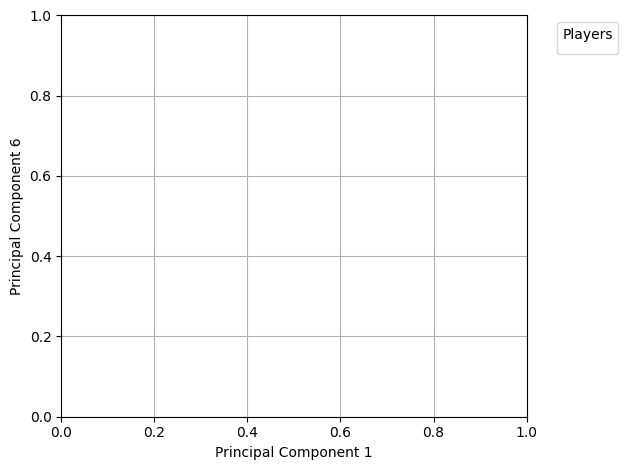

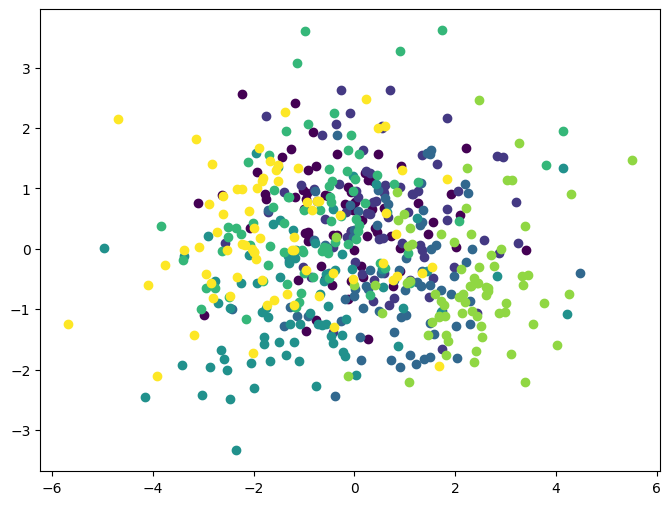

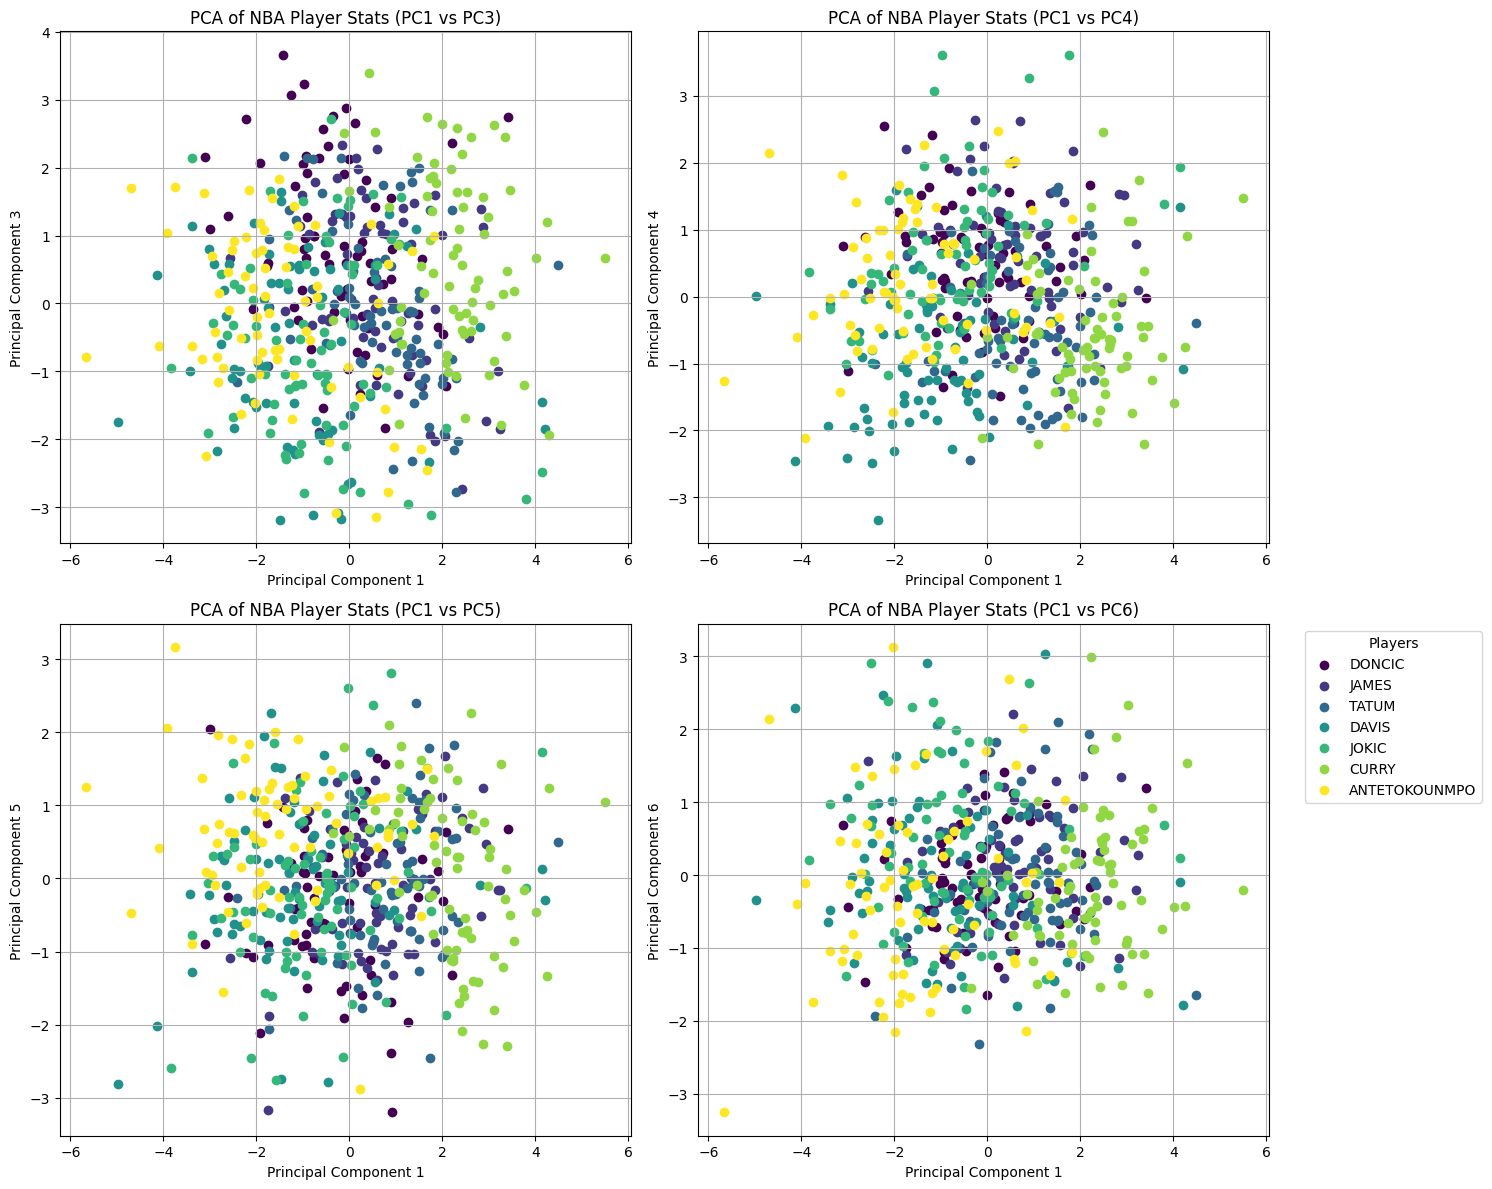

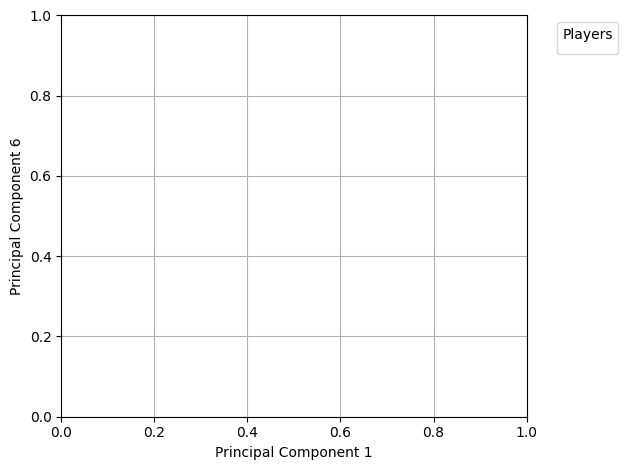

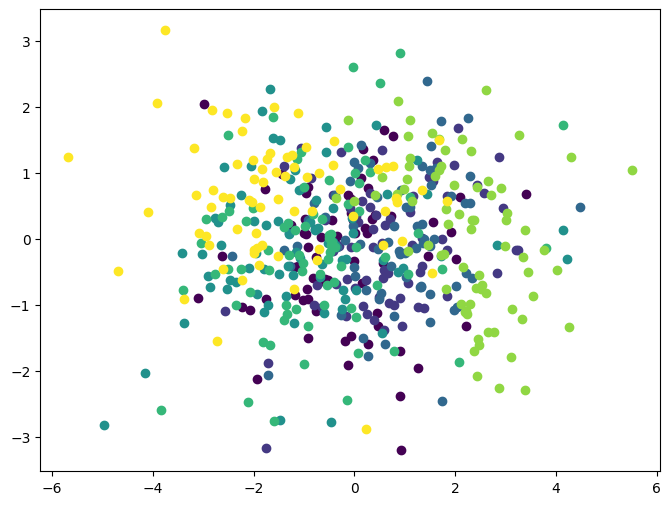

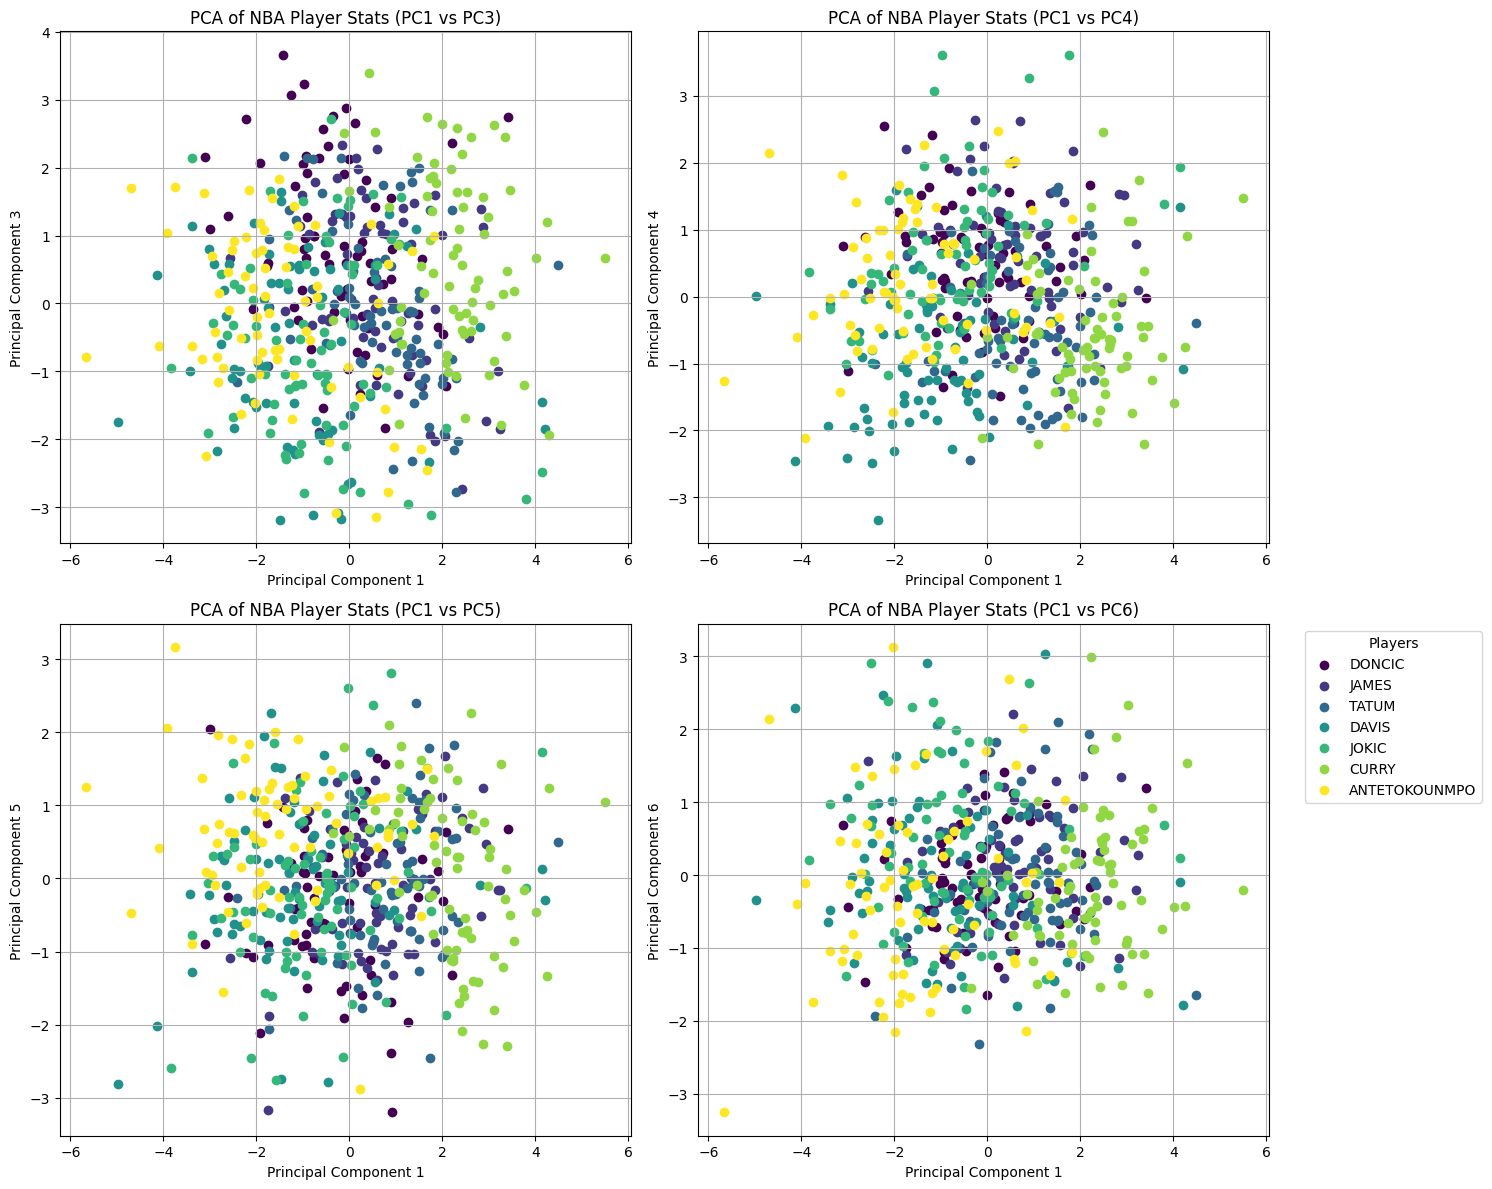

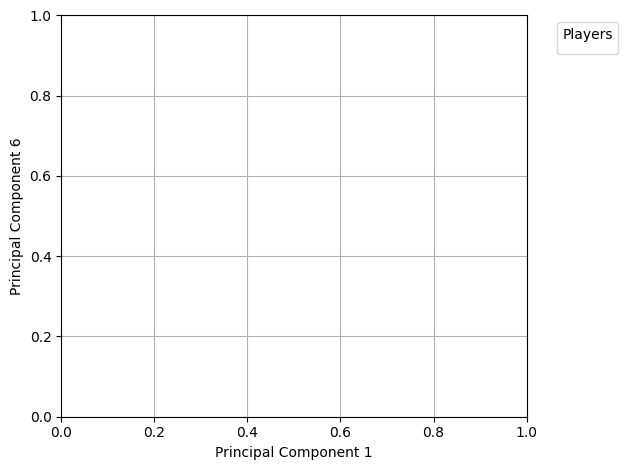

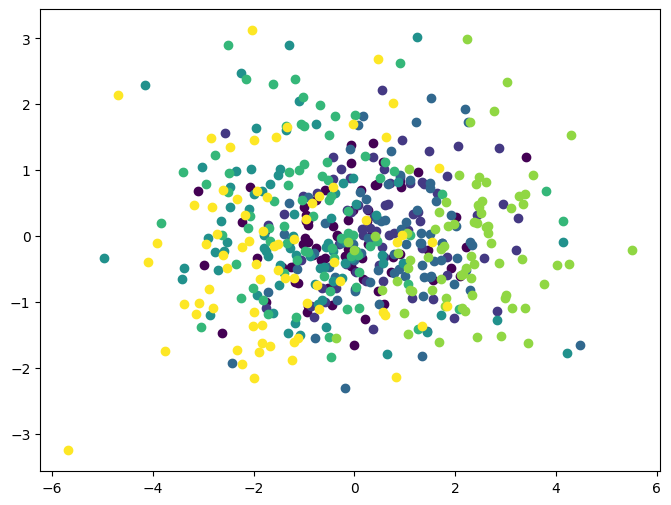

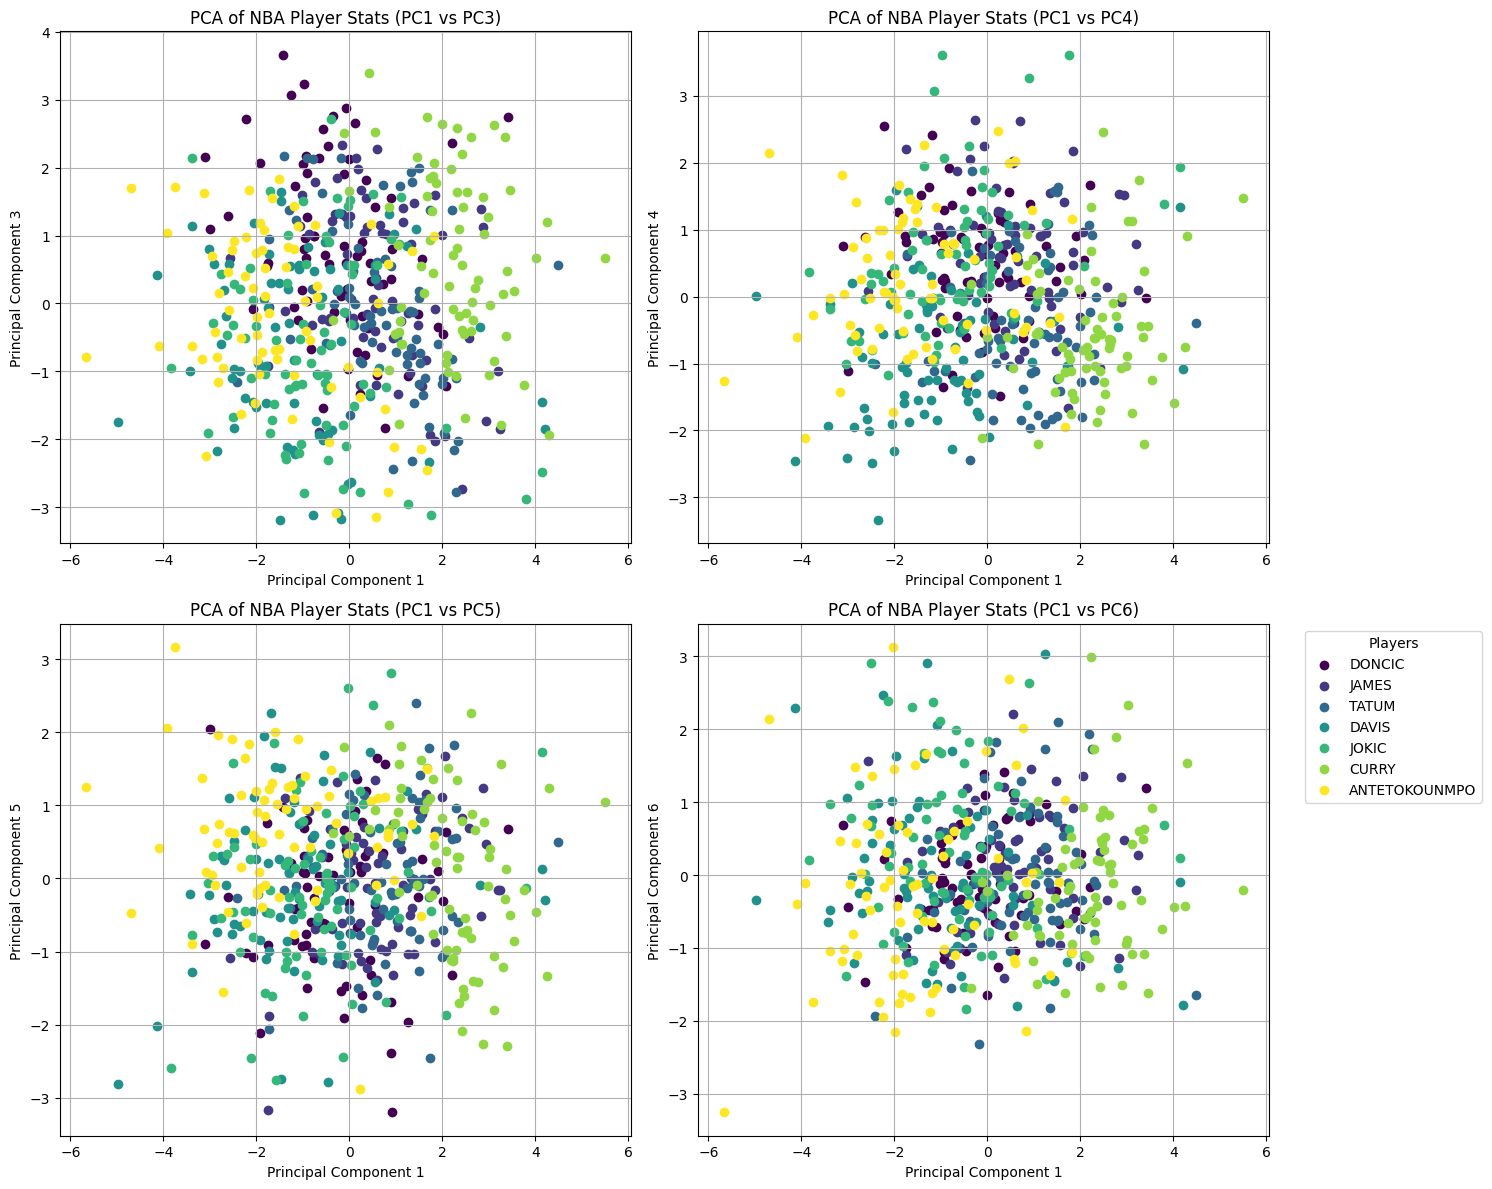

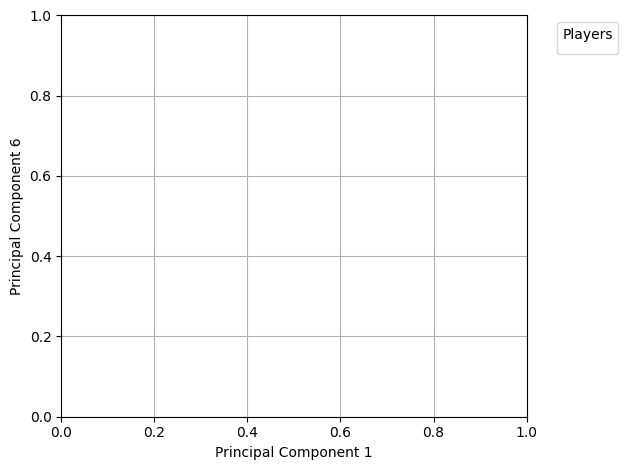

PCA completed, and scatter plot created with player coloring and legend.


In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Compute principal components
Z = X_scaled @ V.T  # Project data onto principal components
players = df_cleaned.iloc[:, 0].str.strip() # Assuming the first column is the player names

############# SCATTER PLOT PCA RESULTS WITH PLAYER COLORING ################
# Use the first two principal components for the scatter plot
plt.figure(figsize=(8, 6))

# Get unique players and assign each a color
unique_players = players.unique()
colors = cm.viridis(np.linspace(0, 1, len(unique_players)))  # Generate a color for each player

# Plot each player with a corresponding color
for i, player in enumerate(unique_players):
    indices = players == player
    plt.scatter(Z[indices, 0], Z[indices, 1], color=colors[i], label=player)

# Adding labels and title
plt.title('PCA of NBA Player Stats')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Adding the legend with player names
plt.legend(title="Players", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a tight layout
plt.tight_layout()
# Show the plot with a tight layout
plt.show()

# Create additional scatter plots for PC1 vs PC3, PC4, PC5, and PC6
pcs_to_plot = [2, 3, 4, 5]
for pc in pcs_to_plot:
    plt.figure(figsize=(8, 6))
    for i, player in enumerate(unique_players):
        indices = players == player
        plt.scatter(Z[indices, 0], Z[indices, pc], color=colors[i], label=player)
    # Create a 2x2 subplot layout for additional scatter plots
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    axs = axs.flatten()

    for idx, pc in enumerate(pcs_to_plot):
        for i, player in enumerate(unique_players):
            indices = players == player
            axs[idx].scatter(Z[indices, 0], Z[indices, pc], color=colors[i], label=player)
        axs[idx].set_title(f'PCA of NBA Player Stats (PC1 vs PC{pc+1})')
        axs[idx].set_xlabel('Principal Component 1')
        axs[idx].set_ylabel(f'Principal Component {pc+1}')
        axs[idx].grid(True)

    # Adding the legend with player names to the last subplot
    axs[-1].legend(title="Players", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    plt.xlabel('Principal Component 1')
    plt.ylabel(f'Principal Component {pc+1}')
    plt.grid(True)
    plt.legend(title="Players", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

print("PCA completed, and scatter plot created with player coloring and legend.")


In [ ]:
#### players encoding

# %% Extract the player names/IDs (assuming they are in the first column)
players = df_cleaned.iloc[:, 0]

# Convert player names/IDs to integer codes
player_codes = players.astype('category').cat.codes  # Convert player names to integer codes
K = player_codes.max() + 1  # Number of unique players

# %% Perform one-out-of-K encoding
# Create a zero matrix for encoding
player_encoding = np.zeros((player_codes.size, K))

# Set the appropriate positions to 1
player_encoding[np.arange(player_codes.size), player_codes] = 1

# %% The encoded matrix now contains the one-out-of-K encoding
print(f"Player Encoding Shape: {player_encoding.shape}")
print(player_encoding[:5])  # Display the first few rows of the encoded matrix
